In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Data Cleaning 

In [71]:
df = pd.read_csv('World Indicators.csv',index_col=0)

In [72]:
df.dtypes

Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [73]:
df

,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
Birth Rate,,,,,,,,,,,,,,,,,,,
0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [74]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Business Tax Rate - 13%
Days to Start Business - 13%
Energy Usage - 35%
GDP - 10%
Health Exp % GDP - 11%
Health Exp/Capita - 11%
Hours to do Tax - 13%
Infant Mortality Rate - 10%
Internet Usage - 4%
Lending Interest - 37%
Life Expectancy Female - 5%
Life Expectancy Male - 5%
Mobile Phone Usage - 6%
Population 0-14 - 8%
Population 15-64 - 8%
Population 65+ - 8%
Population Urban - 1%
Region - 0%
Country - 0%


In [75]:
df = df.dropna()

In [76]:
df.drop_duplicates()

,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
Birth Rate,,,,,,,,,,,,,,,,,,,
0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
0.044,339.1%,65.0,24497.0,"$23,831,631,365",0.061,$15,336.0,0.090,0.0,0.438,51.0,48.0,0.2,0.453,0.519,0.028,0.404,Africa,"Congo, Dem. Rep."
0.024,43.6%,8.0,77649.0,"$236,000,735,704",0.049,$137,433.0,0.019,0.4,0.110,73.0,68.0,1.1,0.314,0.631,0.056,0.430,Africa,"Egypt, Arab Rep."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.020,36.6%,25.0,20582.0,"$170,563,949,736",0.047,$283,309.0,0.014,0.4,0.187,77.0,72.0,1.1,0.296,0.643,0.061,0.773,The Americas,Peru
0.015,29.1%,41.0,20918.0,"$23,676,348,287",0.053,$935,210.0,0.020,0.6,0.080,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States


In [77]:
df.reset_index(inplace = True, drop = False)

In [78]:
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'].str.replace('%', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df['GDP'] = pd.to_numeric(df['GDP'].str.replace('[^0-9]', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
df['Health Exp/Capita']=pd.to_numeric(df['Health Exp/Capita'].str.replace('[^0-9]', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
Countries = df['Country']

In [82]:
##one-hot encoding on categorical columns
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
for col in cateogry_columns:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Country_Thailand,Country_Trinidad and Tobago,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uruguay,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,...,0,0,0,0,0,0,0,0,0,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,...,0,0,0,0,0,0,0,0,0,0
2,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,...,0,0,0,0,0,0,0,0,0,0
3,0.044,339.1,65.0,24497.0,23831631365,0.061,15,336.0,0.090,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.024,43.6,8.0,77649.0,236000735704,0.049,137,433.0,0.019,0.4,...,0,0,0,0,0,0,0,0,0,0


In [83]:
##get a copy of df for hierarchy clustering 
df2 = df.copy()

In [84]:
df3 = df.copy()

In [85]:
##should not normalize because we want our clusters to be spacially sparse (for better clustering) 
##from sklearn.preprocessing import MinMaxScaler
##mms = MinMaxScaler()
##mms.fit(df)
##data_transformed = mms.transform(df)
##df = pd.DataFrame(data_transformed, columns = df.columns)

In [86]:
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Country_Thailand,Country_Trinidad and Tobago,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uruguay,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,...,0,0,0,0,0,0,0,0,0,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,...,0,0,0,0,0,0,0,0,0,0
2,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,...,0,0,0,0,0,0,0,0,0,0
3,0.044,339.1,65.0,24497.0,23831631365,0.061,15,336.0,0.090,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.024,43.6,8.0,77649.0,236000735704,0.049,137,433.0,0.019,0.4,...,0,0,0,0,0,0,0,0,0,0


# K Means

In [87]:
##apply elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

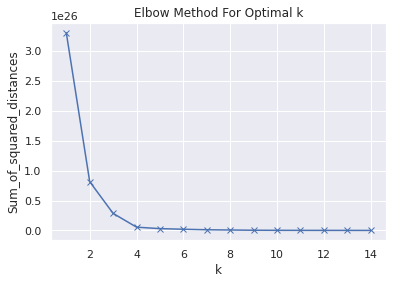

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

choose 4 as n_clusters since after 4 the inertia decreases in a linear fashion. n_clusters = 3 would also be tested out to see which one is optimal.

In [89]:
##choose 4 as n_clusters since after 4 the inertia decreases in a linear fashion. n_clusters = 3 would also 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(df)
df_labels = kmeans.labels_
df['predictedclass_kmeans'] = df_labels
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Country_Trinidad and Tobago,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uruguay,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,predictedclass_kmeans
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,...,0,0,0,0,0,0,0,0,0,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,...,0,0,0,0,0,0,0,0,0,0
2,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,...,0,0,0,0,0,0,0,0,0,0
3,0.044,339.1,65.0,24497.0,23831631365,0.061,15,336.0,0.090,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.024,43.6,8.0,77649.0,236000735704,0.049,137,433.0,0.019,0.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.020,36.6,25.0,20582.0,170563949736,0.047,283,309.0,0.014,0.4,...,0,0,0,0,0,0,0,0,0,0
83,0.015,29.1,41.0,20918.0,23676348287,0.053,935,210.0,0.020,0.6,...,1,0,0,0,0,0,0,0,0,0
84,0.013,46.5,5.0,2191193.0,15533800000000,0.177,8467,187.0,0.006,0.7,...,0,0,0,1,0,0,0,0,0,1
85,0.015,41.9,7.0,4430.0,47236710623,0.088,1213,336.0,0.010,0.5,...,0,0,0,0,1,0,0,0,0,0


In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df)
df3_labels = kmeans.labels_
df3['predictedclass_kmeans'] = df3_labels
df3

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Country_Trinidad and Tobago,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uruguay,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,predictedclass_kmeans
0,0.025,72.0,25.0,41852.0,199070864638,0.044,233,451.0,0.023,0.1,...,0,0,0,0,0,0,0,0,0,0
1,0.046,52.1,66.0,13576.0,104115863405,0.034,178,282.0,0.107,0.1,...,0,0,0,0,0,0,0,0,0,0
2,0.024,19.5,60.0,2215.0,15292424757,0.052,404,152.0,0.039,0.1,...,0,0,0,0,0,0,0,0,0,0
3,0.044,339.1,65.0,24497.0,23831631365,0.061,15,336.0,0.090,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.024,43.6,8.0,77649.0,236000735704,0.049,137,433.0,0.019,0.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.020,36.6,25.0,20582.0,170563949736,0.047,283,309.0,0.014,0.4,...,0,0,0,0,0,0,0,0,0,0
83,0.015,29.1,41.0,20918.0,23676348287,0.053,935,210.0,0.020,0.6,...,1,0,0,0,0,0,0,0,0,0
84,0.013,46.5,5.0,2191193.0,15533800000000,0.177,8467,187.0,0.006,0.7,...,0,0,0,1,0,0,0,0,0,1
85,0.015,41.9,7.0,4430.0,47236710623,0.088,1213,336.0,0.010,0.5,...,0,0,0,0,1,0,0,0,0,0


List of countries for K_means

In [ ]:
df['predictedclass_kmeans'].unique()

array([0, 2, 3, 1], dtype=int32)

In [91]:
df['Country'] = Countries

In [92]:
df3['Country'] = Countries

In [ ]:
df[df['predictedclass_kmeans'] == 0]['Country'].unique()

array(['Algeria', 'Angola', 'Botswana', 'Congo, Dem. Rep.',
       'Egypt, Arab Rep.', 'Kenya', 'Mozambique', 'Namibia', 'Nigeria',
       'South Africa', 'Tanzania', 'Zambia', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Brunei Darussalam', 'Georgia', 'Indonesia',
       'Kyrgyz Republic', 'Malaysia', 'Mongolia', 'Pakistan',
       'Philippines', 'Singapore', 'Sri Lanka', 'Tajikistan', 'Thailand',
       'Vietnam', 'Albania', 'Belarus', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czech Republic', 'Estonia', 'Hungary',
       'Iceland', 'Latvia', 'Macedonia, FYR', 'Malta', 'Moldova',
       'Montenegro', 'Netherlands', 'Romania', 'Serbia', 'Switzerland',
       'Ukraine', 'Bahrain', 'Iran, Islamic Rep.', 'Iraq', 'Israel',
       'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Yemen, Rep.',
       'New Zealand', 'Argentina', 'Bolivia', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Guatemala', 'Haiti',
       'Honduras', 'Jamaica', 'Nicaragua', 'Panama'

In [ ]:
df[df['predictedclass_kmeans'] == 1]['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df[df['predictedclass_kmeans'] == 2]['Country'].unique()

array(['China', 'Japan'], dtype=object)

In [ ]:
df[df['predictedclass_kmeans'] == 3]['Country'].unique()

array(['India', 'Korea, Rep.', 'Italy', 'Russian Federation',
       'United Kingdom', 'Australia', 'Brazil', 'Canada', 'Mexico'],
      dtype=object)

In [93]:
##internal validation kmeans_CH
df_drop = df.drop(['predictedclass_kmeans', 'Country'], axis = 1)
from sklearn import metrics
print('calinski_harabasz_score for kmeans is ' + 
      str(metrics.calinski_harabasz_score(df_drop, df['predictedclass_kmeans'])))

calinski_harabasz_score for kmeans is 1629.5944497025134


In [94]:
df3_drop = df3.drop(['predictedclass_kmeans', 'Country'], axis = 1)
from sklearn import metrics
print('calinski_harabasz_score for kmeans is ' + 
      str(metrics.calinski_harabasz_score(df3_drop, df3['predictedclass_kmeans'])))

calinski_harabasz_score for kmeans is 444.8546830077814


CH score for n_cluster = 4 is 1629.5944497025134 while CH score for n_cluster = 3 is 444.8546830077814. A higher CH score means clusters are well separted, so n_cluster = 4 is the optimal solution.

In [95]:
##internal validation kmeans_silhouette
df_drop = df.drop(['predictedclass_kmeans', 'Country'], axis = 1)
from sklearn import metrics
print('silhouette_score for kmeans is ' + 
      str(metrics.silhouette_score(df_drop, df['predictedclass_kmeans'])))

silhouette_score for kmeans is 0.8422862976052522


The silhouette_score has a range of [-1,1] and the value of 1 indicates that the clusters is very dense and nicely separated. The Silhouette_score for kmeans indicates that kmean algorithm work relatively fine on clustering data. The value of calinski_harabasz score itself does not indicates anything so we would need to compare it with hierarchical clustering. 

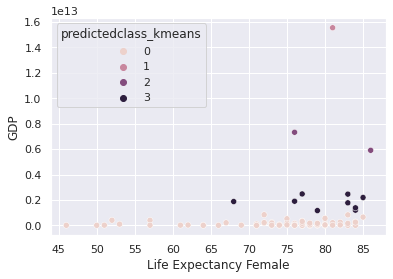

In [96]:
##scatter plot
import seaborn as sns
sns.scatterplot(y='GDP', x = 'Life Expectancy Female', hue = 'predictedclass_kmeans', data = df)

This graph indicates that female live in countries with higher GDP are more likely to have longer life expectancey. 

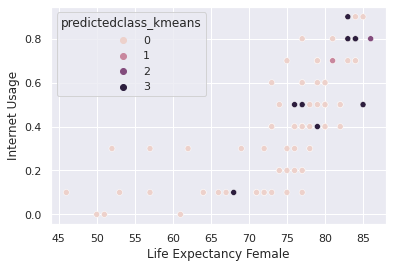

In [ ]:
import seaborn as sns
sns.scatterplot(x ='Life Expectancy Female', y = 'Internet Usage', 
                hue = 'predictedclass_kmeans', data = df)

Countries with longer female life expectancy have a higher internet usage. 



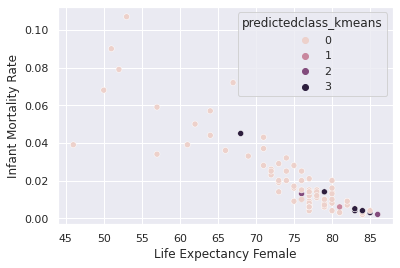

In [ ]:
import seaborn as sns
sns.scatterplot(x ='Life Expectancy Female', y = 'Infant Mortality Rate', 
                hue = 'predictedclass_kmeans', data = df)

Countries with longer life expectancy tend to have a lower infant mortality rate. 

# Hierarchical Clustering 

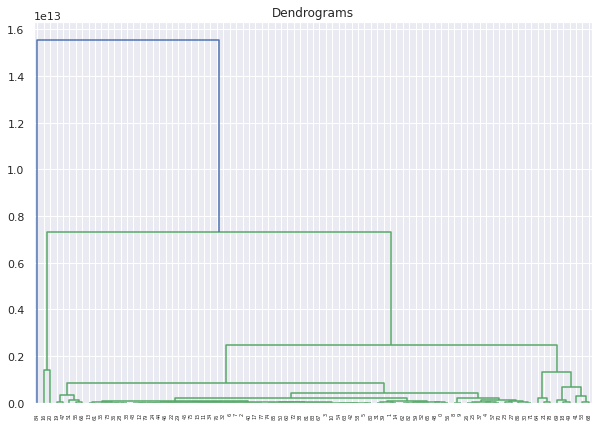

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df2, method='complete'))

According to the dendogram, choosing n_clusters = 4 would explain the most amount of variance in the data when using hierarchical clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df2_labels = Agglo.fit_predict(df2)
df2['predictedclass_agglo'] = df2_labels

In [ ]:
df2['predictedclass_agglo'].unique()

array([0, 1, 3, 2])

List of countries

In [ ]:
df2['Country'] = Countries

In [ ]:
df2[df2['predictedclass_agglo'] == 0]['Country'].unique()

array(['Algeria', 'Angola', 'Botswana', 'Congo, Dem. Rep.',
       'Egypt, Arab Rep.', 'Kenya', 'Mozambique', 'Namibia', 'Nigeria',
       'South Africa', 'Tanzania', 'Zambia', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Brunei Darussalam', 'Georgia', 'Indonesia',
       'Korea, Rep.', 'Kyrgyz Republic', 'Malaysia', 'Mongolia',
       'Pakistan', 'Philippines', 'Singapore', 'Sri Lanka', 'Tajikistan',
       'Thailand', 'Vietnam', 'Albania', 'Belarus',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Estonia', 'Hungary', 'Iceland', 'Latvia', 'Macedonia, FYR',
       'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Romania',
       'Serbia', 'Switzerland', 'Ukraine', 'Bahrain',
       'Iran, Islamic Rep.', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
       'Lebanon', 'Oman', 'Qatar', 'Yemen, Rep.', 'Australia',
       'New Zealand', 'Argentina', 'Bolivia', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Guatemala', 'Haiti',
       'Honduras

In [ ]:
df2[df2['predictedclass_agglo'] == 1]['Country'].unique()

array(['China', 'Japan'], dtype=object)

In [ ]:
df2[df2['predictedclass_agglo'] == 2]['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df2[df2['predictedclass_agglo'] == 3]['Country'].unique()

array(['India', 'Italy', 'Russian Federation', 'United Kingdom', 'Brazil',
       'Canada'], dtype=object)

In [ ]:
##internal validation agglo_CH
df2_drop = df2.drop(['predictedclass_agglo', 'Country'], axis = 1)
from sklearn import metrics
print('calinski_harabasz_score for agglo is ' + 
      str(metrics.calinski_harabasz_score(df2_drop, df2['predictedclass_agglo'])))

calinski_harabasz_score for agglo is 1172.6037117531223


In [ ]:
##internal validation agglo_silhouette
df2_drop = df2.drop(['predictedclass_agglo', 'Country'], axis = 1)
from sklearn import metrics
print('silhouette_score for agglo is ' + 
      str(metrics.silhouette_score(df2_drop, df2['predictedclass_agglo'])))

silhouette_score for agglo is 0.828586802503718


The CH score for kmeans is 1629.5944497025134, while the CH score for hierarchy is 1172.6037117531223. This comparison indicates that kmeans algorithm yields better clustering. 

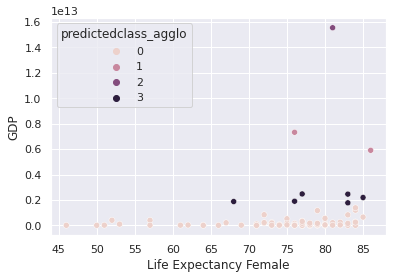

In [ ]:
##scatter plot
import seaborn as sns
sns.scatterplot(y='GDP', x = 'Life Expectancy Female', hue = 'predictedclass_agglo', data = df2)

This graph shows that countries with higher GDP tends to have longer life expectancy for female, although there are some outliers.

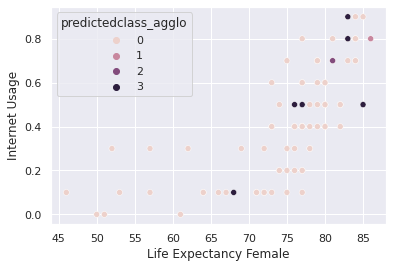

In [ ]:
import seaborn as sns
sns.scatterplot(x ='Life Expectancy Female', y = 'Internet Usage', 
                hue = 'predictedclass_agglo', data = df2)

Countries with longer female life expectancy have a higher internet usage.

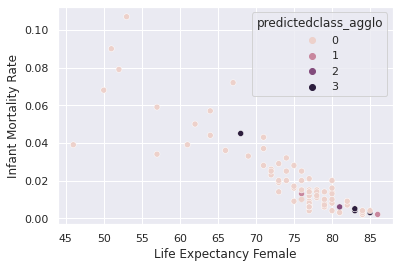

In [ ]:
import seaborn as sns
sns.scatterplot(x ='Life Expectancy Female', y = 'Infant Mortality Rate', 
                hue = 'predictedclass_agglo', data = df2)

Countries with longer life expectancy tend to have a lower infant mortality rate. 

In [ ]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'Days to Start Business',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       ...
       'Country_Ukraine', 'Country_United Kingdom', 'Country_United States',
       'Country_Uruguay', 'Country_Venezuela, RB', 'Country_Vietnam',
       'Country_Yemen, Rep.', 'Country_Zambia', 'predictedclass_kmeans',
       'Country'],
      dtype='object', length=113)